In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('toy_data.txt', names = ['x','y'], sep = ' ', dtype=np.float16)

In [24]:
df

,x,y
0,-1.635742,2.412109
1,-2.957031,2.296875
2,-2.871094,1.832031
3,-2.695312,1.327148
4,-2.271484,1.738281
...,...,...
245,8.664062,0.264893
246,4.605469,-2.113281
247,5.910156,-0.765137
248,5.417969,3.515625


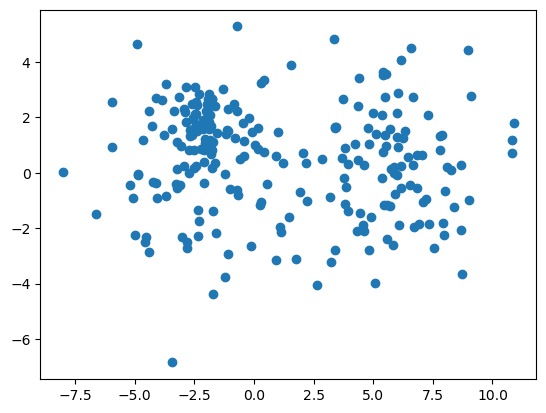

In [26]:
plt.scatter(data=df, x='x', y='y')

In [79]:
X = df.to_numpy()
X.shape

(250, 2)

In [80]:
print(np.max(X[:,0]), np.min(X[:,0]))
print(np.max(X[:,1]), np.min(X[:,1]))

10.89 -8.02
5.28 -6.85


In [104]:
mean = np.sum(X, axis=0) / X.shape[0]
variance = np.sum((X - mean)**2, axis=0) / (X.shape[0]-1)

In [105]:
Xs = (X - mean) / variance
print(np.max(Xs[:,0]), np.min(Xs[:,0]))
print(np.max(Xs[:,1]), np.min(Xs[:,1]))

0.5386 -0.4978
1.28 -2.004


In [106]:
def l2_distance(x,y):
    return np.sum((x-y)**2, axis=0)
def init(X, K, seed):
    n = X.shape[0]
    np.random.seed(seed)
    return X[np.random.choice(n,K, replace=False)]
def assign(X, params):
    cost = 0
    label = np.empty(shape=(X.shape[0],))
    # calculate L2 distance and assign to closest z
    for n in range(X.shape[0]):
        dist1 = l2_distance(X[n], params[0])
        dist2 = l2_distance(X[n], params[1])
        if dist1 < dist2:
            label[n] = 0
            cost += dist1
        else:
            label[n] = 1
            cost += dist2
    return label, cost
def update(X, params, label):
    #calculate mean of each cluster
    x_1 = []
    x_2 = []
    data_point = X.shape[0]
    for n in range(data_point):
        if label[n] == 0:
            x_1.append(X[n])
        else:
            x_2.append(X[n])
    m_1 = np.sum(np.array(x_1), axis = 0) / len(x_1)
    m_2 = np.sum(np.array(x_2), axis = 0) / len(x_2)
    return m_1, m_2
def plot(X, label, params, count):
    plt.scatter(x= X[:,0], y= X[:,1], c=label)
    plt.scatter(x= params[:,0], y= params[:,1], color= 'red', marker = 'x')
    plt.title(f'iter:{count}')
    plt.show()
def run(X, params):
    prev_cost = None
    cost = None
    count = 0
    while (prev_cost is None or (prev_cost - cost) > 1e-4):
        prev_cost = cost
        label , cost = assign(X, params)
        print(f'cost: {cost}')
        plot(X, label, params, count)
        count+=1
        params[0], params[1] = update(X, params, label)

[[ 7.316  2.092]
 [-1.818  0.661]]
cost: 2207.0841674804688


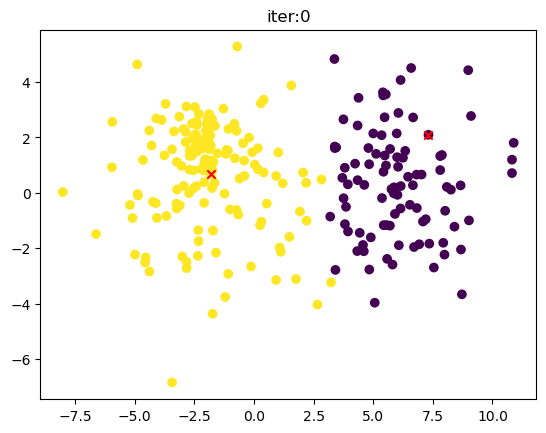

cost: 1701.1939392089844


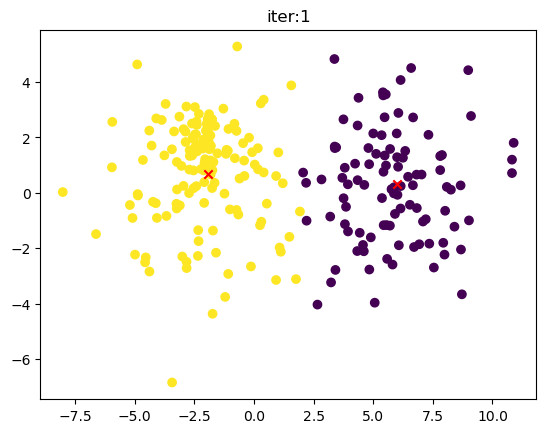

cost: 1686.466220855713


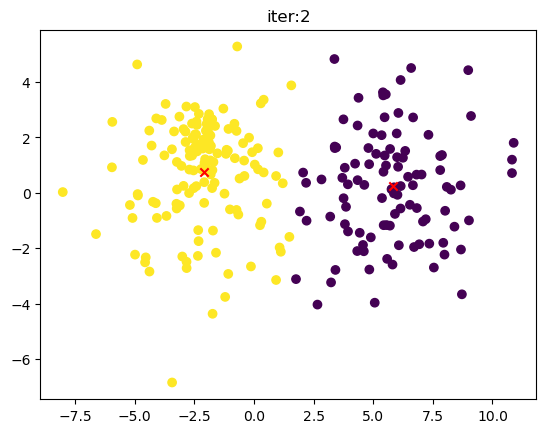

cost: 1685.1268424987793


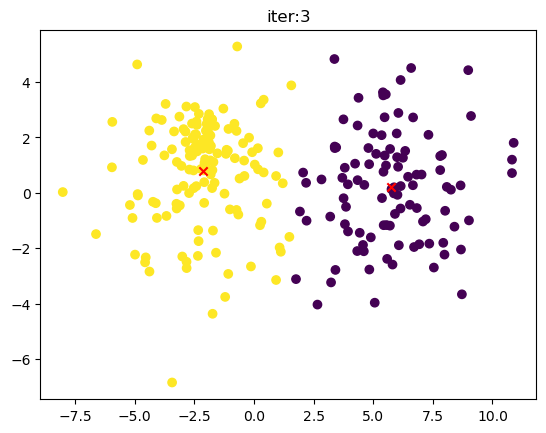

cost: 1685.1268424987793


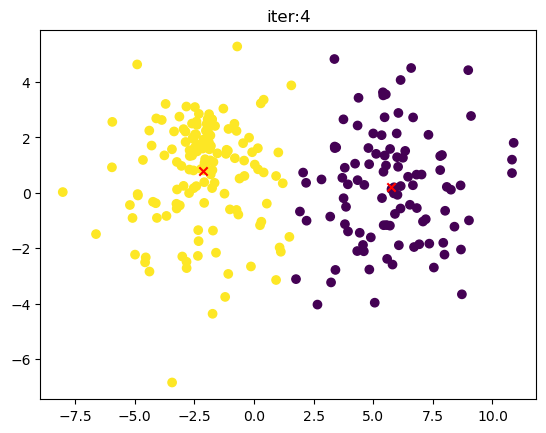

In [109]:
params = init(X, 2, seed=0)
print(params)
run(X, params)

# Now we expand to K situation

In [164]:
class K_mean:
    def __init__(self, K, seed):
        self.K = K
        np.random.seed(seed)
    def _set_params(self,X):
        self.n = X.shape[0]
        self.params = X[np.random.choice(self.n,self.K, replace=False)]
    def assign(self, X):
        label = np.zeros(shape=(self.n, self.K))
        # calculate L2 distance and assign to closest z
        for j in range(self.n):
            dist = np.sum((self.params- X[j,:])**2, axis=1)
            h = np.argmin(dist)
            label[j,h] = 1
        return label
    def update(self, X, label):
        n_hat = np.sum(label, axis = 0)
        cost = 0
        for k in range(self.K):
            b = np.array(label[:,k])
            self.params[k,:] = np.dot(b,X) / n_hat[k]
            sse = np.sum((self.params[k,:] - X)**2, axis=1) @ label[:,k]
            cost +=sse
        return cost
    def run(self, X):
        self._set_params(X)
        prev_cost = None
        cost = None
        count = 0
        while (prev_cost is None or (prev_cost - cost) > 1e-4):
            prev_cost = cost
            label = self.assign(X)
            count+=1
            cost = self.update(X, label)
            print(cost)
            self.plot(X, label, count)
    def plot(self,X, label, count):
        l = []
        for x in label:
            h = np.argmax(x)
            l.append(h)
        plt.scatter(x= X[:,0], y= X[:,1], c=l)
        plt.scatter(x= self.params[:,0], y= self.params[:,1], color= 'red', marker = 'x')
        plt.title(f'iter:{count}')
        plt.show()

1478.6593780517578


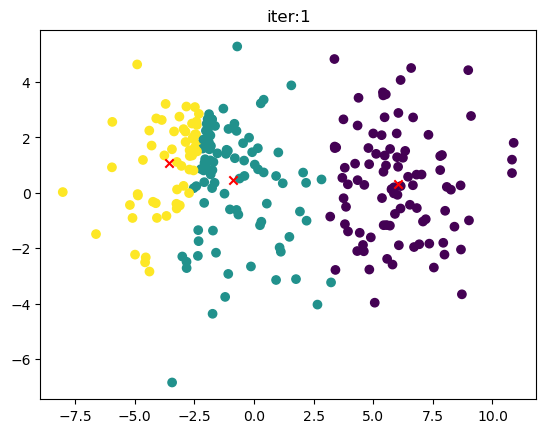

1444.9646949768066


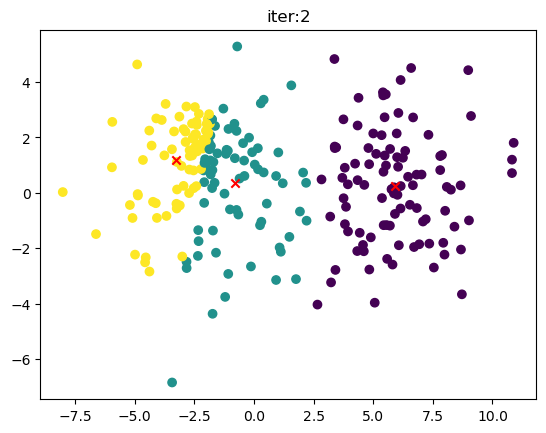

1398.6295776367188


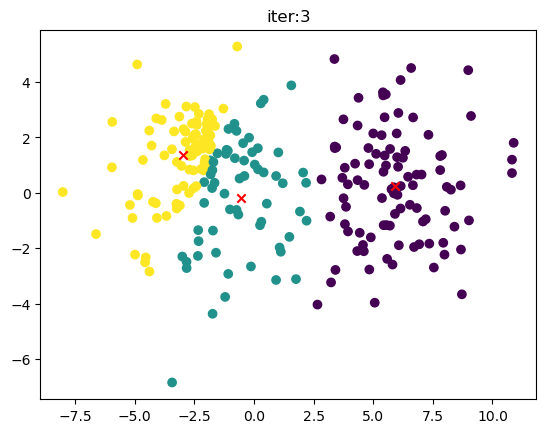

1373.950439453125


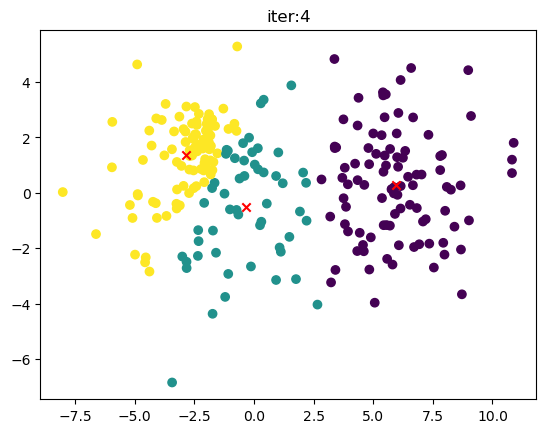

1360.2224502563477


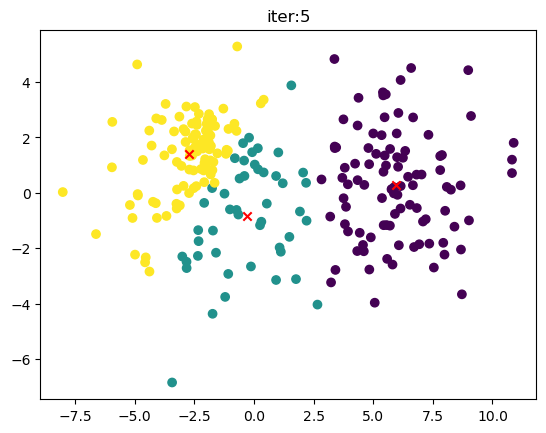

1345.3907051086426


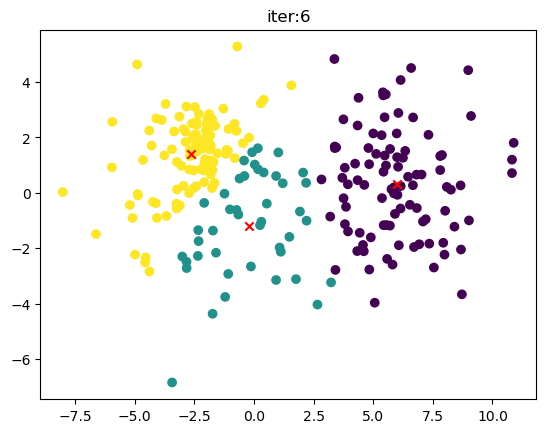

1336.9235763549805


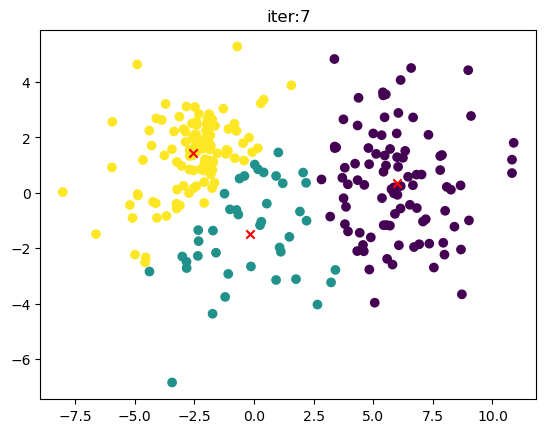

1336.9235763549805


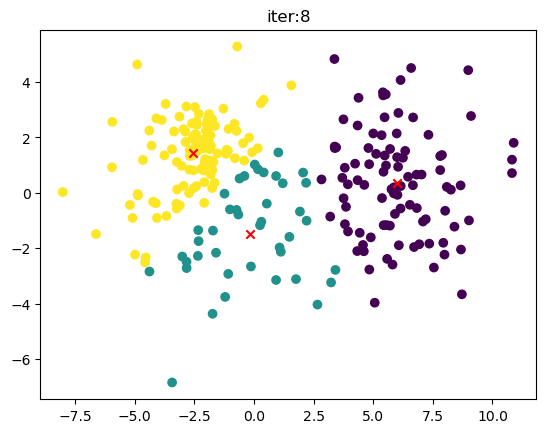

In [170]:
model = K_mean(3,0)
model.run(X)